In [1]:
import sys 
sys.path.append('..')
from common.util import create_contexts_target, most_similar
from cbow import CBOW
from common.optimizer import Adam
from common.trainer import Trainer

In [2]:
window_size = 5
hidden_size = 100
batch_size = 100
max_epoch = 10

In [3]:
from dataset import ptb
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus = corpus[:10000]

In [4]:
vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)


In [5]:
model = CBOW(vocab_size, hidden_size, window_size, corpus)

| epoch 1 | iter 1 / 99 | time 0[s] | loss 4.16
| epoch 1 | iter 6 / 99 | time 0[s] | loss 4.16
| epoch 1 | iter 11 / 99 | time 0[s] | loss 4.16
| epoch 1 | iter 16 / 99 | time 0[s] | loss 4.15
| epoch 1 | iter 21 / 99 | time 0[s] | loss 4.15
| epoch 1 | iter 26 / 99 | time 1[s] | loss 4.13
| epoch 1 | iter 31 / 99 | time 1[s] | loss 4.11
| epoch 1 | iter 36 / 99 | time 1[s] | loss 4.08
| epoch 1 | iter 41 / 99 | time 1[s] | loss 4.04
| epoch 1 | iter 46 / 99 | time 1[s] | loss 3.99
| epoch 1 | iter 51 / 99 | time 2[s] | loss 3.94
| epoch 1 | iter 56 / 99 | time 2[s] | loss 3.88
| epoch 1 | iter 61 / 99 | time 2[s] | loss 3.81
| epoch 1 | iter 66 / 99 | time 2[s] | loss 3.76
| epoch 1 | iter 71 / 99 | time 2[s] | loss 3.71
| epoch 1 | iter 76 / 99 | time 3[s] | loss 3.65
| epoch 1 | iter 81 / 99 | time 3[s] | loss 3.60
| epoch 1 | iter 86 / 99 | time 3[s] | loss 3.53
| epoch 1 | iter 91 / 99 | time 3[s] | loss 3.49
| epoch 1 | iter 96 / 99 | time 3[s] | loss 3.44
| epoch 2 | iter 1 / 9

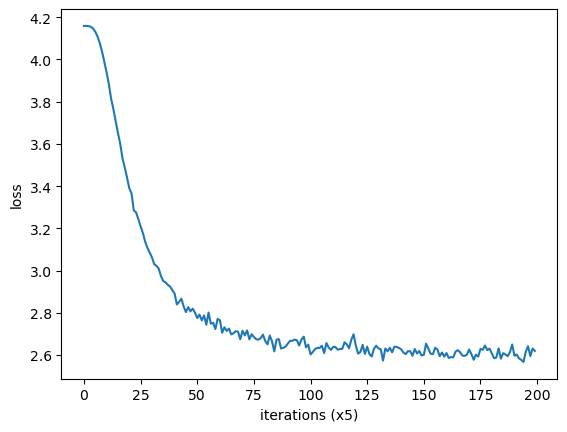

In [6]:
optimizer = Adam()
trainer = Trainer(model, optimizer)
trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [7]:
querys = ['you', 'year', 'car', 'toyota']
word_vecs = model.word_vecs
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs)


[query] you
mr.: 0.9954037666320801
he: 0.9952441453933716
that: 0.9949234127998352
the: 0.9941697120666504
is: 0.9941584467887878

[query] year
to: 0.9966172575950623
at: 0.9957876205444336
in: 0.9957632422447205
of: 0.9955439567565918
after: 0.9948861002922058

[query] car
sister: 0.388427734375
opted: 0.35378751158714294
assassinations: 0.34051093459129333
enactment: 0.3399745523929596
statements: 0.3221994638442993

[query] toyota
installations: 0.3923340439796448
event: 0.3582685887813568
hearing: 0.34660935401916504
minerals: 0.33094337582588196
combine: 0.3244219422340393
